# Import libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [17]:
transaction_file_path = "/home/sunbeam/Downloads/transaction_data.csv"
purchase_file_path = "/home/sunbeam/Downloads/purchase_behaviour.csv"

transaction_data = pd.read_csv(transaction_file_path)
purchase_data = pd.read_csv(purchase_file_path)

# Analyze Top 3 Most Profitable Products

In [18]:
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])['TOT_SALES']
    .sum()
    .reset_index()
    .sort_values(by='TOT_SALES', ascending=False)
    .head(3)
)

# Analyze Most Loyal Customer Segment

In [19]:
loyal_customers = (
    transaction_data.groupby("LYLTY_CARD_NBR")['TXN_ID']
    .count()
    .reset_index()
    .rename(columns={"TXN_ID": "FREQUENCY"})
    .sort_values(by="FREQUENCY", ascending=False)
)

# Merge with customer segment data

In [20]:
loyal_customers = loyal_customers.merge(purchase_data, on="LYLTY_CARD_NBR", how="left")

# Identify most frequent customer segment

In [21]:
top_customer_segment = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['FREQUENCY']
    .sum()
    .reset_index()
    .sort_values(by="FREQUENCY", ascending=False)
    .head(1)
)

# Visualization

/tmp/ipykernel_6811/3961505848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")


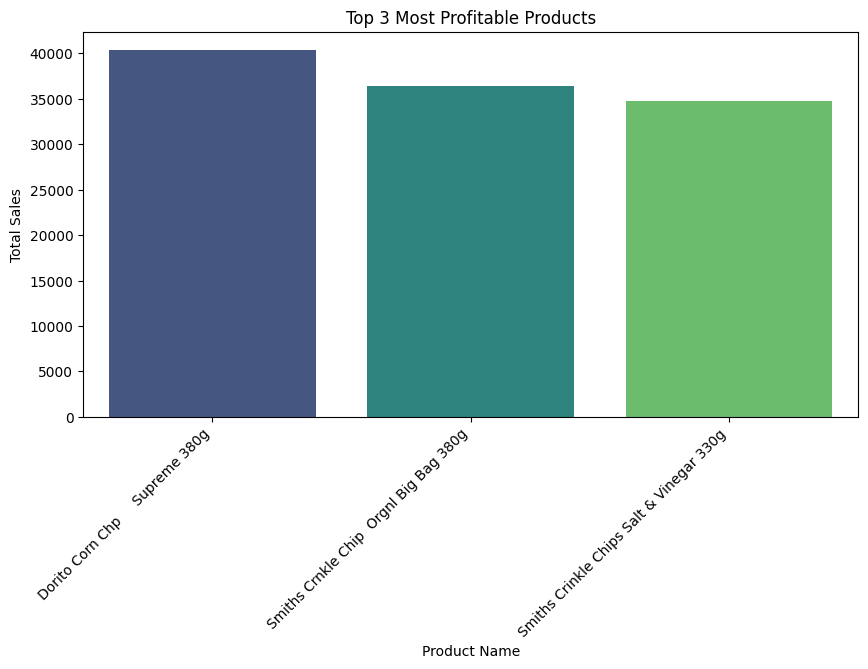

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="PROD_NAME", y="TOT_SALES", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

# Display Results

In [23]:
print("Top 3 Most Profitable Products:\n", top_products)
print("\nMost Loyal Customer Segment:\n", top_customer_segment)

Top 3 Most Profitable Products:
     PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Most Loyal Customer Segment:
         LIFESTAGE PREMIUM_CUSTOMER  FREQUENCY
6  OLDER FAMILIES           Budget      23160


# Summary

Summary of Findings:
1. The top 3 most profitable products are:
   - Dorito Corn Chip Supreme (380g)
   - Smiths Crinkle Chip Original Big Bag (380g)
   - Smiths Crinkle Chips Salt & Vinegar (330g)

2. The most loyal customer segment consists of Older Families in the Budget category,
   indicating that they prioritize affordability and larger-sized products.

3. Larger pack sizes and well-known brands appear to attract repeat purchases,
   making them an essential focus for marketing strategies.